# ARMA Model with ACF and PACF Analysis

In this notebook, we will demonstrate how to use an ARMA model for time series forecasting, along with 
Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to identify the appropriate 
model parameters. 

We will generate synthetic ARMA data and use Python's `statsmodels` library to fit the model. This notebook will also 
include detailed explanations of each step in the process.


### Step 1: Import Required Libraries

We will use the following Python libraries for our analysis:
- `numpy` for numerical operations
- `matplotlib` for plotting
- `statsmodels` for time series modeling and ACF/PACF functions


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

### Step 2: Generate Synthetic ARMA Data

We will simulate data from an ARMA(2,1) process. This will allow us to work with a time series where we already know the underlying model structure.


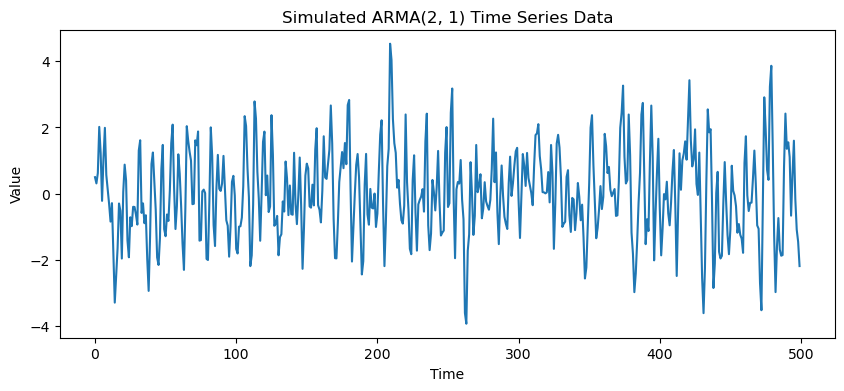

In [2]:
# Define the ARMA model with known parameters (p=2, q=1)
ar_params = np.array([1, -0.5, 0.25])  # AR(2) with coefficients
ma_params = np.array([1, 0.4])  # MA(1) with coefficient

arma_process = ArmaProcess(ar=ar_params, ma=ma_params)
np.random.seed(42)  # Set seed for reproducibility
data = arma_process.generate_sample(nsample=500)

# Plot the synthetic time series data
plt.figure(figsize=(10, 4))
plt.plot(data)
plt.title("Simulated ARMA(2, 1) Time Series Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.show()


### Step 3: Plot ACF and PACF

We will use the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots to help identify the appropriate number of AR terms (p) and MA terms (q) for our model.
- The **ACF** helps us determine the value of `q` (MA terms).
- The **PACF** helps us determine the value of `p` (AR terms).


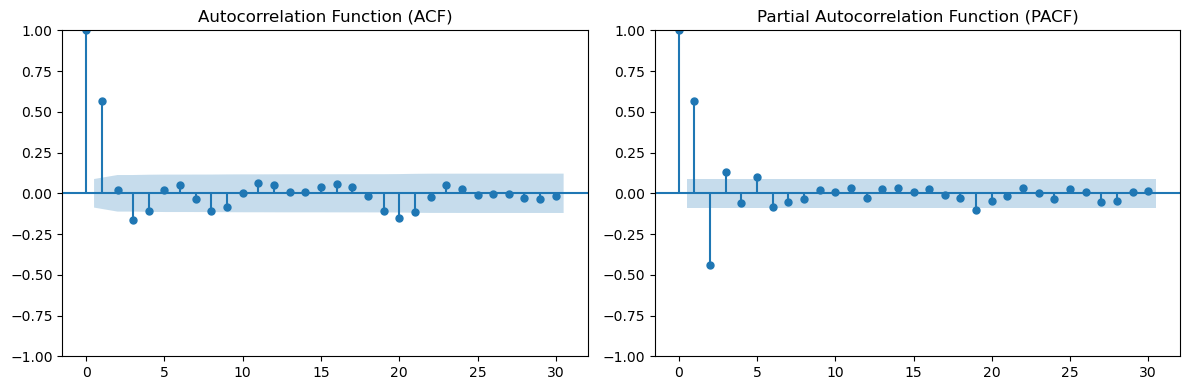

In [3]:
# Plot the ACF and PACF to identify p and q
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plot_acf(data, lags=30, ax=plt.gca())
plt.title("Autocorrelation Function (ACF)")

plt.subplot(1, 2, 2)
plot_pacf(data, lags=30, ax=plt.gca())
plt.title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()


### Step 4: Fit an ARMA Model

Based on the ACF and PACF plots, we can determine that the most appropriate values for our ARMA model are:
- `p = 2` (from PACF)
- `q = 1` (from ACF)

We will now fit the ARMA(2,1) model to the data.


In [4]:
# Fit the ARMA model (ARIMA with d=0 is ARMA)
p = 2
q = 1

model = ARIMA(data, order=(p, 0, q))
model_fit = model.fit()

# Print the summary of the model
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  500
Model:                 ARIMA(2, 0, 1)   Log Likelihood                -699.867
Date:                Sun, 18 Aug 2024   AIC                           1409.735
Time:                        08:42:28   BIC                           1430.808
Sample:                             0   HQIC                          1418.004
                                - 500                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.082      0.158      0.874      -0.148       0.174
ar.L1          0.4893      0.090      5.452      0.000       0.313       0.665
ar.L2         -0.2492      0.068     -3.648      0.000      -0.383      -0.115
ma.L1          0.4127      0.084      4.934      0.000       0.249       0.577
sigma2         0.9605      0.059     16.351      0.000       0.845       1.076
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 4.28
Prob(Q):                              0.90   Prob(JB):                         0.12
Heteroskedasticity (H):               1.17   Skew:                             0.18
Prob(H) (two-sided):                  0.31   Kurtosis:                         3.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Step 5: Analyze Residuals

After fitting the model, it's important to check the residuals. Residuals should behave like white noise (i.e., no autocorrelation).
We will plot the residuals and then check their ACF plot to ensure there is no remaining structure in the errors.


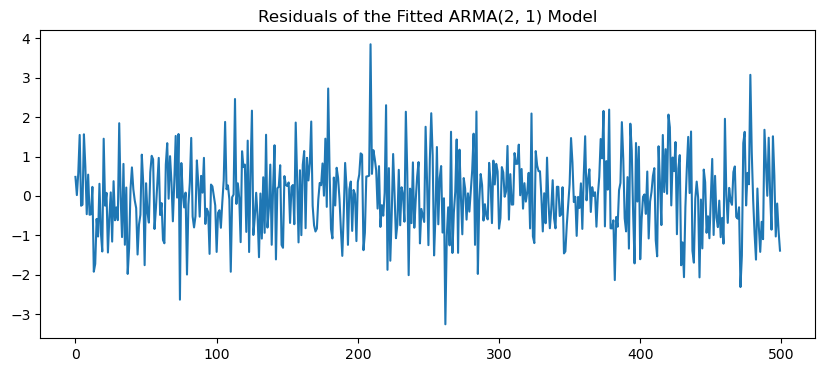

<Figure size 800x200 with 0 Axes>

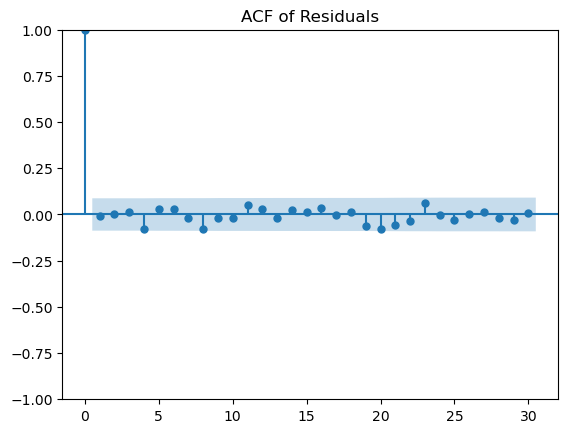

In [5]:
# Plot the residuals of the fitted model
residuals = model_fit.resid

plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title("Residuals of the Fitted ARMA(2, 1) Model")
plt.show()

# Plot the ACF of residuals to check for autocorrelation
plt.figure(figsize=(8, 2))
plot_acf(residuals, lags=30)
plt.title("ACF of Residuals")
plt.show()


### Conclusion

In this notebook, we demonstrated how to:
1. Simulate a time series using an ARMA(2,1) process.
2. Use ACF and PACF plots to identify appropriate values of `p` and `q`.
3. Fit an ARMA model to the data and analyze the residuals to confirm model adequacy.
The residuals showed no significant autocorrelation, indicating that the model was well-fitted.
